# CAVIAR Investigation Study

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two-year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in `phase1.csv`, `phase2.csv`, ..., correspond to these eleven, two-month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. The following summarizes the 11 seizures:

| Phase  | Seizures | Value ($)   | Quantity                     |
|--------|----------|-------------|------------------------------|
| Phase 4 | 1        | $2,500,000  | 300 kg of marijuana          |
| Phase 6 | 3        | $1,300,000  | 2 x 15 kg of marijuana + 1 x 2 kg of cocaine |
| Phase 7 | 1        | $3,500,000  | 401 kg of marijuana          |
| Phase 8 | 1        | $360,000    | 9 kg of cocaine              |
| Phase 9 | 2        | $4,300,000  | 2 kg of cocaine + 1 x 500 kg marijuana |
| Phase 10| 1        | $18,700,000 | 2200 kg of marijuana         |
| Phase 11| 2        | $1,300,000  | 12 kg of cocaine + 11 kg of cocaine |

This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):

- **Daniel Serero (n1)**: Mastermind of the network.
- **Pierre Perlini (n3)**: Principal lieutenant of Serero, he executes Serero's instructions.
- **Alain (n83) and Gérard (n86) Levy**: Investors and transporters of money.
- **Wallace Lee (n85)**: Takes care of financial affairs (accountant).
- **Gaspard Lino (n6)**: Broker in Spain.
- **Samir Rabbat (n11)**: Provider in Morocco.
- **Lee Gilbert (n88)**: Trusted man of Wallace Lee (became an informer after the arrest).
- **Beverly Ashton (n106)**: Spouse of Lino, transports money and documents.
- **Antonio Iannacci (n89)**: Investor.
- **Mohammed Echouafni (n84)**: Moroccan investor.
- **Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76)**: Charged with recuperating the marijuana.
- **Roderik Janouska (n77)**: Individual with airport contacts.
- **Patrick Lee (n87)**: Investor.
- **Salvatore Panetta (n82)**: Transport arrangements manager.
- **Steve Cunha (n96)**: Transport manager, owner of a legitimate import company (became an informer after the arrest).
- **Ernesto Morales (n12)**: Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.
- **Oscar Nieri (n17)**: The handyman of Morales.
- **Richard Brebner (n80)**: Was transporting the cocaine from the US to Montréal.
- **Ricardo Negrinotti (n33)**: Was taking possession of the cocaine in the US to hand it to Brebner.
- **Johnny Pacheco (n16)**: Cocaine provider.

In the data files (`phase1.csv`, `phase2.csv`, ...), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

Paper: [Modeling Verdict Outcomes Using Social Network Measures: The Watergate and Caviar Network Cases](https://www.researchgate.net/publication/292304919_Modeling_Verdict_Outcomes_Using_Social_Network_Measures_The_Watergate_and_Caviar_Network_Cases)


In [47]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
phases = {}
G = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

In [12]:
G

{1: <networkx.classes.graph.Graph at 0x7838481346d0>,
 2: <networkx.classes.graph.Graph at 0x7838481350f0>,
 3: <networkx.classes.graph.Graph at 0x783848135840>,
 4: <networkx.classes.graph.Graph at 0x783848135480>,
 5: <networkx.classes.graph.Graph at 0x7838481348e0>,
 6: <networkx.classes.graph.Graph at 0x7838481351e0>,
 7: <networkx.classes.graph.Graph at 0x783848134f40>,
 8: <networkx.classes.graph.Graph at 0x783848134940>,
 9: <networkx.classes.graph.Graph at 0x783848135780>,
 10: <networkx.classes.graph.Graph at 0x783848135f30>,
 11: <networkx.classes.graph.Graph at 0x7838481365c0>}

In [10]:
phases[1]

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8
n1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1
n4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n89,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
n83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
n3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
n5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n88,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
n85,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
n90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Part (a)
What is the size of the network at each phase? Plot the evolution of the number of node and number of edges over time, from phase 1 to 11.

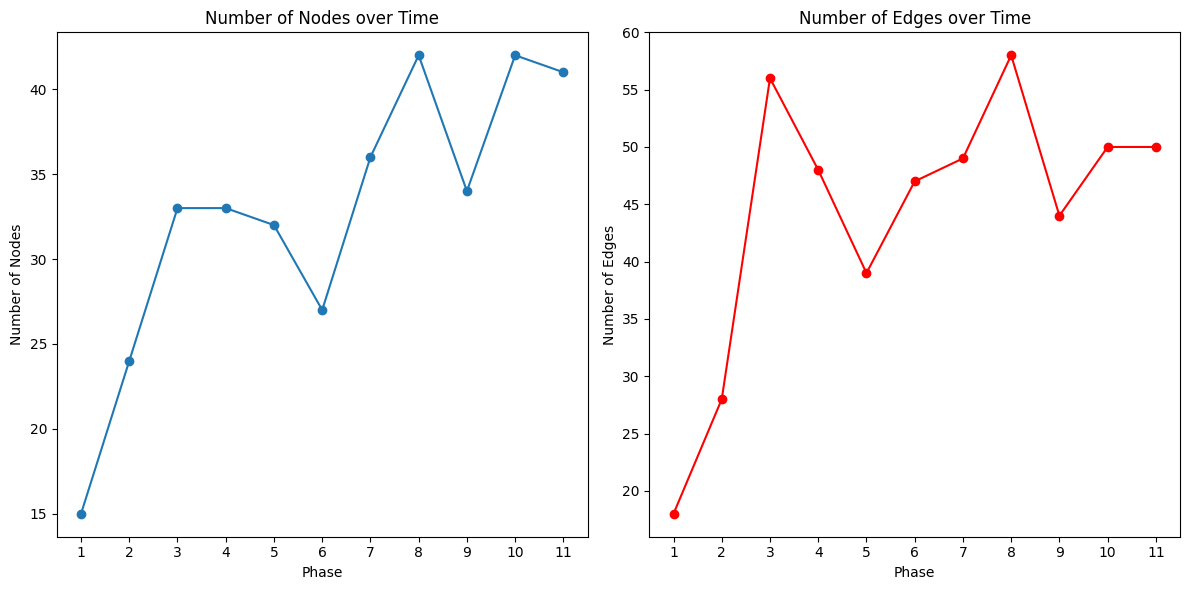

In [16]:
# Gather data on the size of the network at each phase
num_nodes = []
num_edges = []

for i in range(1, 12):
    num_nodes.append(G[i].number_of_nodes())
    num_edges.append(G[i].number_of_edges())

# Plot the evolution of the number of nodes and edges over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), num_nodes, marker='o')
plt.title("Number of Nodes over Time")
plt.xlabel("Phase")
plt.ylabel("Number of Nodes")
plt.xticks(range(1, 12))

plt.subplot(1, 2, 2)
plt.plot(range(1, 12), num_edges, marker='o', color='r')
plt.title("Number of Edges over Time")
plt.xlabel("Phase")
plt.ylabel("Number of Edges")
plt.xticks(range(1, 12))

plt.tight_layout()
plt.show()


In [19]:
num_nodes[1], num_nodes[5], num_nodes[9]

(24, 27, 42)

In [20]:
num_edges[1], num_edges[5], num_edges[9]

(28, 47, 50)

In [33]:
# !sudo add-apt-repository universe -y
# !sudo apt update -y
# !sudo apt-get reinstall graphviz graphviz-dev -y
# !pip install pygraphviz

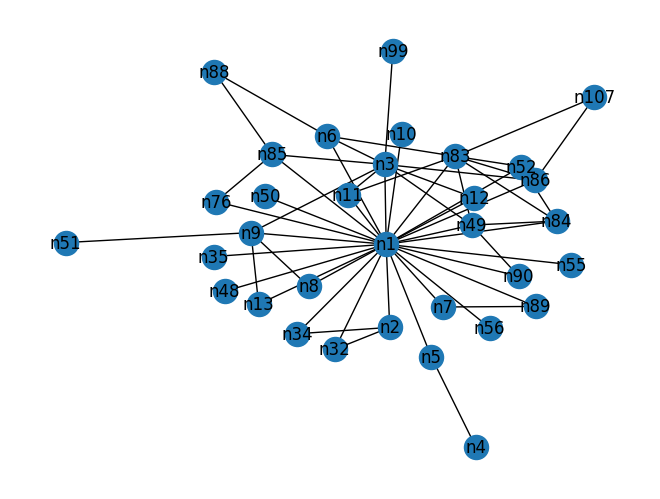

In [36]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)  

## Part (b)

For each of the 11 phases and for each of the players under investigation (i.e., the 23 listed above) , compute and list the normalized degree centrality of the player.

The normalized degree centrality of node i is defined as

\displaystyle \tilde{k}_ i	\displaystyle = \frac{k_ i}{n-1},		
where k_ i is the degree of node i and n is the number of nodes in the graph.

You can compute the normalized degree centrality using the networkx function networkx.degree_centrality.

Provide the degree centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)



In [37]:
nx.degree_centrality(G[3])

{'n1': 0.84375,
 'n4': 0.03125,
 'n89': 0.0625,
 'n83': 0.25,
 'n3': 0.28125,
 'n5': 0.0625,
 'n48': 0.03125,
 'n88': 0.0625,
 'n85': 0.125,
 'n90': 0.0625,
 'n86': 0.125,
 'n2': 0.09375,
 'n7': 0.0625,
 'n6': 0.125,
 'n8': 0.0625,
 'n55': 0.03125,
 'n10': 0.03125,
 'n56': 0.03125,
 'n76': 0.0625,
 'n9': 0.15625,
 'n34': 0.0625,
 'n35': 0.03125,
 'n11': 0.09375,
 'n32': 0.0625,
 'n84': 0.125,
 'n49': 0.15625,
 'n107': 0.0625,
 'n50': 0.03125,
 'n99': 0.03125,
 'n13': 0.0625,
 'n51': 0.03125,
 'n12': 0.0625,
 'n52': 0.09375}

In [38]:
nx.degree_centrality(G[9])

{'n1': 0.30303030303030304,
 'n89': 0.030303030303030304,
 'n83': 0.030303030303030304,
 'n3': 0.33333333333333337,
 'n88': 0.030303030303030304,
 'n85': 0.09090909090909091,
 'n90': 0.030303030303030304,
 'n2': 0.030303030303030304,
 'n7': 0.06060606060606061,
 'n6': 0.030303030303030304,
 'n8': 0.06060606060606061,
 'n76': 0.15151515151515152,
 'n11': 0.030303030303030304,
 'n13': 0.030303030303030304,
 'n12': 0.24242424242424243,
 'n14': 0.030303030303030304,
 'n18': 0.030303030303030304,
 'n17': 0.030303030303030304,
 'n82': 0.18181818181818182,
 'n78': 0.06060606060606061,
 'n87': 0.24242424242424243,
 'n79': 0.09090909090909091,
 'n16': 0.030303030303030304,
 'n81': 0.030303030303030304,
 'n59': 0.030303030303030304,
 'n37': 0.030303030303030304,
 'n36': 0.030303030303030304,
 'n96': 0.12121212121212122,
 'n46': 0.06060606060606061,
 'n29': 0.030303030303030304,
 'n30': 0.06060606060606061,
 'n105': 0.030303030303030304,
 'n101': 0.030303030303030304,
 'n41': 0.030303030303030304

For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node i is defined as

\displaystyle \tilde{B}_ i = \frac{2}{(n-1)(n-2)} \sum _{s\neq i\neq t} \frac{n^ i_{st}}{g_{st}},		
where n^ i_{st} is the number of shortest paths between s and t that pass through i and g_{st} is the total number of shortest paths between s and t. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for n^ i_{st} and for n^ i_{ts}).

You can compute the normalized betweenness centrality using the networkx function networkx.betweenness_centrality(graph, normalized = True)

Provide the normalized betweenness centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)



In [39]:
nx.betweenness_centrality(G[3], normalized = True)

{'n1': 0.829502688172043,
 'n4': 0.0,
 'n89': 0.0,
 'n83': 0.046572580645161295,
 'n3': 0.09549731182795697,
 'n5': 0.0625,
 'n48': 0.0,
 'n88': 0.0006720430107526881,
 'n85': 0.029973118279569885,
 'n90': 0.0,
 'n86': 0.028024193548387095,
 'n2': 0.0010080645161290322,
 'n7': 0.0,
 'n6': 0.03333333333333333,
 'n8': 0.0,
 'n55': 0.0,
 'n10': 0.0,
 'n56': 0.0,
 'n76': 0.0,
 'n9': 0.06754032258064516,
 'n34': 0.0,
 'n35': 0.0,
 'n11': 0.0008064516129032258,
 'n32': 0.0,
 'n84': 0.0006720430107526881,
 'n49': 0.007526881720430107,
 'n107': 0.0,
 'n50': 0.0,
 'n99': 0.0,
 'n13': 0.0,
 'n51': 0.0,
 'n12': 0.0,
 'n52': 0.0}

In [40]:
nx.betweenness_centrality(G[9], normalized = True)

{'n1': 0.2490530303030303,
 'n89': 0.0,
 'n83': 0.0,
 'n3': 0.5762310606060607,
 'n88': 0.0,
 'n85': 0.06060606060606061,
 'n90': 0.0,
 'n2': 0.0,
 'n7': 0.08775252525252526,
 'n6': 0.0,
 'n8': 0.0,
 'n76': 0.13194444444444445,
 'n11': 0.0,
 'n13': 0.0,
 'n12': 0.3573232323232323,
 'n14': 0.0,
 'n18': 0.0,
 'n17': 0.0,
 'n82': 0.11568813131313133,
 'n78': 0.025883838383838384,
 'n87': 0.2362689393939394,
 'n79': 0.0625,
 'n16': 0.0,
 'n81': 0.0,
 'n59': 0.0,
 'n37': 0.0,
 'n36': 0.0,
 'n96': 0.038983585858585856,
 'n46': 0.0,
 'n29': 0.0,
 'n30': 0.019886363636363636,
 'n105': 0.0,
 'n101': 0.0,
 'n41': 0.0}

For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

\sqrt{\sum _ i v_ i^2} = 1.
You can compute the eigenvector centrality with this normalization using the networkx function networkx.eigenvector_centrality.

Provide the eigenvector centrality for the following four players, at the specified phases: (Provide your answer to three significant figures, answer graded to 1% tolerance.)


In [41]:
nx.eigenvector_centrality(G[3])

{'n1': 0.5938791958045414,
 'n4': 0.014355434541900984,
 'n89': 0.10779841864618867,
 'n83': 0.2774973009007579,
 'n3': 0.291304887672891,
 'n5': 0.09344298411402496,
 'n48': 0.09123754828984905,
 'n88': 0.05360468578884205,
 'n85': 0.16206747439619537,
 'n90': 0.12623746000076858,
 'n86': 0.18964754653259738,
 'n2': 0.12517975378436813,
 'n7': 0.10779841864618867,
 'n6': 0.1868573648241205,
 'n8': 0.11835643320921982,
 'n55': 0.09123754828984905,
 'n10': 0.09123754828984905,
 'n56': 0.09123754828984905,
 'n76': 0.11613568713220572,
 'n9': 0.17652251473120775,
 'n34': 0.11046871892110087,
 'n35': 0.09123754828984905,
 'n11': 0.17862208073125885,
 'n32': 0.11046871892110087,
 'n84': 0.19401421412059242,
 'n49': 0.22782181913316768,
 'n107': 0.07176681246995305,
 'n50': 0.09123754828984905,
 'n99': 0.044752920727746365,
 'n13': 0.11835643320921982,
 'n51': 0.02711888491937081,
 'n12': 0.13599046901759537,
 'n52': 0.16367526437300345}

In [42]:
nx.eigenvector_centrality(G[9])

{'n1': 0.4589575176167989,
 'n89': 0.09358743865951574,
 'n83': 0.09178102356758051,
 'n3': 0.4679877147323067,
 'n88': 0.03861377605182318,
 'n85': 0.19309035604069172,
 'n90': 0.09358743865951574,
 'n2': 0.09358743865951574,
 'n7': 0.1004095105321829,
 'n6': 0.09178102356758051,
 'n8': 0.18536846222709621,
 'n76': 0.28270679857238745,
 'n11': 0.09178102356758051,
 'n13': 0.028130113615355567,
 'n12': 0.14065936326685183,
 'n14': 0.028130113615355567,
 'n18': 0.028130113615355567,
 'n17': 0.028130113615355567,
 'n82': 0.3313841025326668,
 'n78': 0.06335699656358872,
 'n87': 0.36685585850760893,
 'n79': 0.034114004534771605,
 'n16': 0.028130113615355567,
 'n81': 0.07336272049522029,
 'n59': 0.05653492469092155,
 'n37': 0.07336272049522029,
 'n36': 0.06626926372887099,
 'n96': 0.1923098059613257,
 'n46': 0.10472691184306128,
 'n29': 0.028130113615355567,
 'n30': 0.06658776172954586,
 'n105': 0.07336272049522029,
 'n101': 0.006822071872667166,
 'n41': 0.07336272049522029}

In [70]:
# Create dictionaries to store centrality measures
degree_centrality = {f"n{j+1}": [] for j in range(max(num_nodes))}
betweenness_centrality = {f"n{j+1}": [] for j in range(max(num_nodes))}
eigenvector_centrality = {f"n{j+1}": [] for j in range(max(num_nodes))}

# Compute centrality measures for each phase
for i in range(1, 12):
    # Degree centrality
    deg_cent = nx.degree_centrality(G[i])
    for node in degree_centrality:
        degree_centrality[node].append(deg_cent.get(node, 0))

    # Betweenness centrality
    bet_cent = nx.betweenness_centrality(G[i], normalized=True)
    for node in betweenness_centrality:
        betweenness_centrality[node].append(bet_cent.get(node, 0))

    # Eigenvector centrality
    eig_cent = nx.eigenvector_centrality(G[i])
    for node in eigenvector_centrality:
        eigenvector_centrality[node].append(eig_cent.get(node, 0))

# Calculate mean centrality across all phases
mean_degree_centrality = {node: np.mean(degrees) for node, degrees in degree_centrality.items()}
mean_betweenness_centrality = {node: np.mean(betweenness) for node, betweenness in betweenness_centrality.items()}
mean_eigenvector_centrality = {node: np.mean(eigenvectors) for node, eigenvectors in eigenvector_centrality.items()}

# Find the top 3 players for betweenness centrality
top_betweenness = sorted(mean_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 3 players for eigenvector centrality
top_eigenvector = sorted(mean_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Convert node names to integers for the answers
top_betweenness_int = [int(node[1:]) for node, _ in top_betweenness]
top_eigenvector_int = [int(node[1:]) for node, _ in top_eigenvector]

top_betweenness_int, top_eigenvector_int


([1, 12, 3, 41, 14], [1, 3, 8, 12, 2])

In [69]:
mean_eigenvector_centrality

{'n1': 0.5463910796025788,
 'n2': 0.1143017983857542,
 'n3': 0.2980946631382842,
 'n4': 0.07086969700825438,
 'n5': 0.08553047384744336,
 'n6': 0.09733603139768351,
 'n7': 0.03152333895009412,
 'n8': 0.15239397677796265,
 'n9': 0.10068037663051319,
 'n10': 0.026176773545970436,
 'n11': 0.09269035950804848,
 'n12': 0.14189335589468527,
 'n13': 0.05211172342676842,
 'n14': 0.051697333545449205,
 'n15': 0.047777800029916835,
 'n16': 0.013840524327510966,
 'n17': 0.029129125576417406,
 'n18': 0.02243756576054431,
 'n19': 0.06188276066890805,
 'n20': 0.02947353113368462,
 'n21': 0.008365368883754776,
 'n22': 0.007605033463795321,
 'n23': 0.0008950070503292967,
 'n24': 0.0006324464205360863,
 'n25': 0.009492048483362643,
 'n26': 0.010387736546450903,
 'n27': 0.037109895072313465,
 'n28': 0.01776093734268945,
 'n29': 0.002557283055941415,
 'n30': 0.00605343288450417,
 'n31': 0.035360799458782476,
 'n32': 0.014914105718689482,
 'n33': 0.0008950070503292967,
 'n34': 0.04012817121053514,
 'n35':

## Part (f)

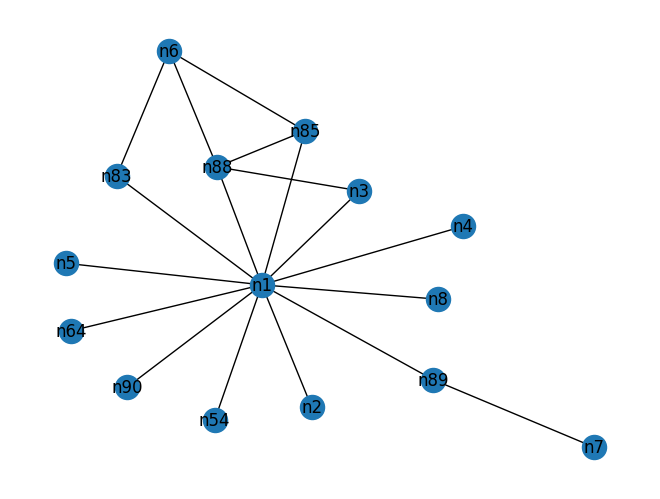

In [71]:
nx.draw(G[1], pos=nx.drawing.nx_agraph.graphviz_layout(G[1]), with_labels=True)  

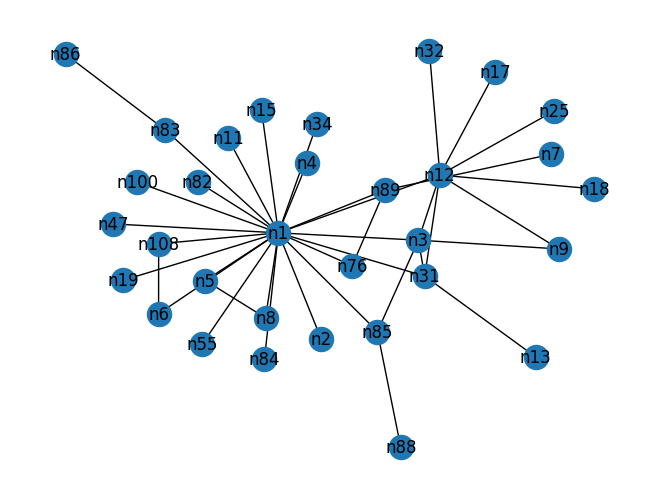

In [73]:
nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels=True)  